### User Input

For a single simulation, a [template code], [Single_run.ipynb], [Cell_Substrate.py], and [pyMCDS.py] are placed in the same folder. Then, open the [Single_run.ipynb] file using IDE (e.g., PyCharm and Google Colab). In the Single_run.ipynb, update group name in following code block using the template code folder name. The following example is for the template folder DM.

[template code]: https://github.com/ashleefv/covid19fibrosis/tree/master/Template%20of%20in%20silico%20experiments
[Single_run.ipynb]: https://github.com/ashleefv/covid19fibrosis/blob/master/Analysis/Single_run.ipynb
[Cell_Substrate.py]: https://github.com/ashleefv/covid19fibrosis/blob/master/Analysis/Cell_Substrate.py
[pyMCDS.py]: https://github.com/ashleefv/covid19fibrosis/blob/master/Analysis/pyMCDS.py

In [1]:
group = 'DM'

### Importing required files and libraries

In [2]:
from pyMCDS import pyMCDS
from Cell_Substrate import SVGTab

import glob
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random, pickle
import os
import seaborn as sns

### Creating output folder "plot" to save the output plots

In [3]:
root_directory = os.getcwd()
try:
    os.chdir(group)
except:
    print('Add a template directory for simulation')
    
path = root_directory+ '\\' + group + '\\'

path2 = path + 'plot'
try:
    os.chdir(path2)
except:
    os.mkdir('plot')

### Running simulation
The following code block will make a copy of the template folder and name it as "1". Then, in the terminal, it will run "make data-cleanup", "make", and ".\COVID19" commands to compile and run the simulation.

In [4]:
os.chdir(path)
replication = 1
for i in range(replication):
    itc = i + 1
    os.chdir(path)
    new_simulation = 'cp -rf template ' + str(itc)
    os.system(new_simulation)

    path1 = path + str(itc)
    os.chdir(path1)
    os.system("start /B make data-cleanup & make & .\COVID19")

### Extracting output data
"itc" in the following code block denotes the generated folder "1" from running the simulation. The following code block will extract data for CD8+ T cells, total macrophages, secreting_agents, fibroblasts, uninfected cells, infected cells, dead cells, TGF-β, collagen, and population of macrophage phenotypes (M1, M2, MI, MH, and ME).

In [5]:
itc = 1
collagen_area = np.zeros(replication)
path1 = path + str(itc) + '\output'
os.chdir(path1)
xml_files = glob.glob('output*.xml')
xml_files.sort()

n = len(xml_files)
t = np.zeros(n)
uninfected = np.zeros(n)
infected = np.zeros(n)
dead = np.zeros(n)
CD8 = np.zeros(n)
macrophage = np.zeros(n)
secreting_agent = np.zeros(n)
fibroblast = np.zeros(n)
viron = np.zeros(n)
collagen = np.zeros(n)
TGF = np.zeros(n)
pro = np.zeros(n)
M1 = np.zeros(n)
M2 = np.zeros(n)
MI = np.zeros(n)
MH = np.zeros(n)
ME = np.zeros(n)
idx = 0
TGFa = [[] for _ in range(n)]
collagena = [[] for _ in range(n)]
timea = [[] for _ in range(n)]

mcds1 = pyMCDS(xml_files[-1], '.')
t_final = mcds1.get_time()

for f in xml_files:
    mcds = pyMCDS(f, '.')
    t[idx] = mcds.get_time()

    cycle = mcds.data['discrete_cells']['cycle_model']
    cycle = cycle.astype(int)
    phase = mcds.data['discrete_cells']['ability_to_phagocytose_infected_cell']
    phase = phase.astype(int)
    active = mcds.data['discrete_cells']['activated_immune_cell']
    active = active.astype(int)
    ex = mcds.data['discrete_cells']['M2_phase']
    ex = ex.astype(int)
    ex2 = mcds.data['discrete_cells']['total_volume']
    ex2 = ex2.astype(int)
    cell_type = mcds.data['discrete_cells']['cell_type']
    cell_type = cell_type.astype(int)


    ID_uninfected = np.where((mcds.data['discrete_cells']['assembled_virion'] < 1) & (cycle < 100) & (
                mcds.data['discrete_cells']['cell_type'] == 1))
    ID_infected = np.where((mcds.data['discrete_cells']['assembled_virion'] >= 1) & (cycle < 100) & (
                mcds.data['discrete_cells']['cell_type'] == 1))
    dead_ID = np.where((cycle >= 100) & (mcds.data['discrete_cells']['cell_type'] == 1))
    uninfected[idx] = len(ID_uninfected[0])
    infected[idx] = len(ID_infected[0])

    dead[idx] = len(dead_ID[0])

    ID_CD8 = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 3))

    CD8[idx] = len(ID_CD8[0])
    ID_fibroblast = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 8))

    fibroblast[idx] = len(ID_fibroblast[0])

    ID_macrophage = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 4))
    macrophage[idx] = len(ID_macrophage[0])

    ID_secreting_agent = np.where((cycle < 100) & (mcds.data['discrete_cells']['cell_type'] == 9))
    secreting_agent[idx] = len(ID_secreting_agent[0])

    mac1 = np.where((cell_type == 4) & (cycle < 100) & (active == 1) & (ex == 0))
    M1[idx] = len(mac1[0])
    mac2 = np.where((cell_type == 4) & (cycle < 100) & (ex == 1))
    M2[idx] = len(mac2[0])
    mac3 = np.where((cell_type == 4) & (cycle < 100) & (active == 0))
    MI[idx] = len(mac3[0])
    mac4 = np.where((cell_type == 4) & (cycle < 100) & (phase == 1))
    MH[idx] = len(mac4[0])
    mac5 = np.where((cell_type == 4) & (cycle < 100) & (ex2 > 6500))
    ME[idx] = len(mac5[0])

    z_val = 0.00
    sum = 0.0
    sum1 = 0.0
    xx1 = np.ravel(mcds.get_mesh()[:][0][0])

    plane_oxy = mcds.get_concentrations('collagen', z_slice=z_val)
    plane_oxy1 = mcds.get_concentrations('anti-inflammatory cytokine', z_slice=z_val)

    
    # saving end data point of substrate
    if t[idx] == t_final:
        pickle.dump(plane_oxy, open('baseline.p', 'wb'))


    # average concentration
    count_average = 0
    for i in range(len(xx1)):
        for j in range(len(xx1)):
            sum = sum + plane_oxy[i][j]
            sum1 = sum1 + plane_oxy1[i][j]*1e12
            count_average = count_average + 1


    # individual grid concentration
    for i in range(len(xx1)):
        for j in range(len(xx1)):
            TGFa[idx].append(plane_oxy1[i][j]*1e12)
            collagena[idx].append(plane_oxy[i][j])
            timea[idx].append(mcds.get_time()/(60*24))

    collagen[idx] = sum/(count_average)
    TGF[idx] = sum1/(count_average)

    idx += 1


cell1 = np.array([CD8, macrophage, secreting_agent, fibroblast, uninfected, infected, dead, TGF, collagen, M1, M2, MI, MH, ME])
time = t / (60 * 24)

### Generating plot for cell population

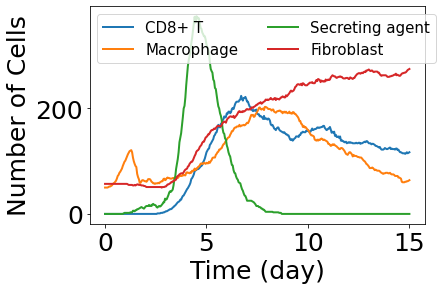

In [6]:
os.chdir(path2)
plt.rcParams.update({'font.size': 25})
plt.plot(time, CD8, label='CD8+ T', linewidth=2)
plt.plot(time, macrophage, label='Macrophage', linewidth=2)
plt.plot(time, secreting_agent, label='Secreting agent', linewidth=2)
plt.plot(time, fibroblast, label='Fibroblast', linewidth=2)

plt.legend(loc='upper left', prop={"size": 15}, ncol=2)
plt.xlabel('Time (day)')
plt.ylabel('Number of Cells')
# plt.ylim([-20,450])
plt.savefig("cell.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating plot for macrophage phenotypes

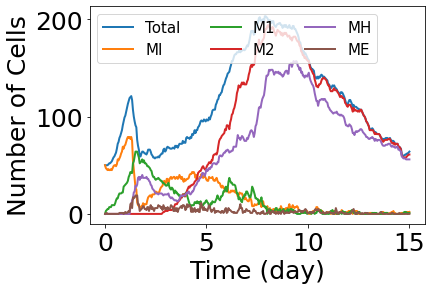

In [7]:
plt.plot(time, macrophage, label='Total', linewidth=2)
plt.plot(time, MI, label='MI', linewidth=2)
plt.plot(time, M1, label='M1', linewidth=2)
plt.plot(time, M2, label='M2', linewidth=2)
plt.plot(time, MH, label='MH', linewidth=2)
plt.plot(time, ME, label='ME', linewidth=2)

plt.legend(loc='upper left', prop={"size": 15}, ncol=3)
plt.xlabel('Time (day)')
plt.ylabel('Number of Cells')
# plt.ylim([-30,600])
plt.savefig("cell1.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating plot for TGF-β mean of all voxels of simulation domain

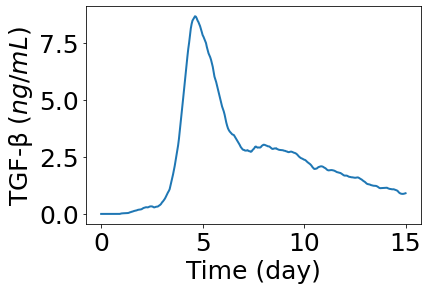

In [8]:
plt.plot(time, TGF, label='r', linewidth=2)
plt.xlabel('Time (day)')
plt.ylabel('TGF-β ($ng/mL$)')
# plt.ylim([-0.25,11])
plt.savefig("TGF.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating plot for collagen mean of all voxels of simulation domain

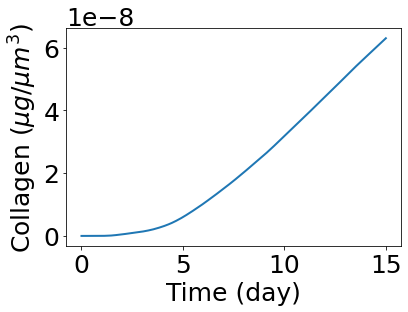

In [9]:
plt.plot(time, collagen, linewidth=2)
plt.xlabel('Time (day)')
plt.ylabel('Collagen ($μg/μm^3$)')
# plt.ylim([-0.25e-8,11e-8])
plt.savefig("collagen.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating overlaying plot for cell and collagen

The SVGTab function is available in Cell_Substrate.py

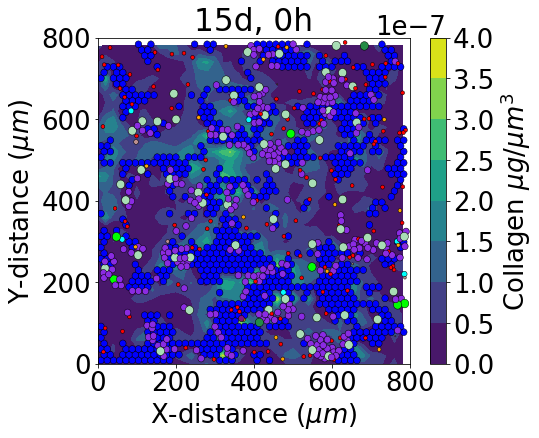

In [10]:
pathCC = path + str(itc)
os.chdir(pathCC)
a = SVGTab()
plt.rcParams.update({'font.size': 26})
a.plot_svg(n-1)
os.chdir(path2)
plt.savefig("Cells_Collagen.png", dpi=300, bbox_inches='tight')
plt.show()

### Generating seaborn heatmap to quantify fibrotic areas
Here a threshold value (threshold = 1e-7) is set assuming above that concentration of collagen, the grid will be cobsidered as fibrotic grid. The upper threshold value is set for plotting purpose.

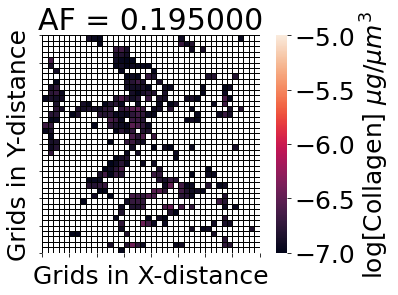

In [11]:
threshold = 1e-7
threshold_u = 1e-5

os.chdir(path1)
plane_oxy = np.array(pickle.load(open('baseline.p', 'rb')))
xx1 = np.linspace(0,800,40)
yy1 = np.linspace(0,800,40)

log_data = [ [0]*len(xx1) for i in range(len(yy1))]

for i in range(len(xx1)):
    for j in range(len(yy1)):
        if plane_oxy[i][j] <= threshold:
            log_data[i][j] = np.nan

        if plane_oxy[i][j] > threshold:
            log_data[i][j] = np.log10(plane_oxy[i][j])


count3 = 0
count4= 0
for i in range(len(log_data)):
    for j in range(len(log_data)):
        if np.isnan(log_data[i][j]):
            count3 = count3 + 1
        else:
            count4 = count4 + 1
areaf = count4/1600

plt.rcParams.update({'font.size': 25})
ax = sns.heatmap(log_data, linewidths=0, linecolor='black', square=True, vmin=(np.log10(threshold)), vmax=(np.log10(threshold_u)), cbar_kws={'label': 'log[Collagen] $μg/μm^3$', 'orientation': 'vertical'}, linewidth=0.5)
ax.set_xlabel('Grids in X-distance')
ax.set_ylabel('Grids in Y-distance')
ax.invert_yaxis()
plt.title('AF = %f' %areaf)
plt.xticks(np.arange(0, 42, step=5))
plt.yticks(np.arange(0, 42, step=5))

os.chdir(path2)
plt.savefig(group + str(itc)+".png", dpi=300, bbox_inches='tight')
plt.show()